In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor

In [2]:
df = pd.read_csv(r"C:\Users\priyadharshini\Desktop\Priyaa\dataset\stores_sales_forecasting.csv", encoding="latin1")
print(df.head())
print(df.info())   
print(df.describe())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

In [ ]:
# Handle missing values separately for numerical and categorical columns
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].fillna(df[col].mode()[0]) 
    else: 
        df[col] = df[col].fillna(df[col].median()) 

In [12]:

# Define target variable and features
target_col = "Sales"  
X = df.drop(columns=[target_col])
y = df[target_col]

# Convert categorical variables 
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoost model
model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=50)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

0:	learn: 462.1633959	total: 13.1ms	remaining: 6.56s
50:	learn: 203.9771399	total: 675ms	remaining: 5.95s
100:	learn: 164.3877563	total: 1.33s	remaining: 5.27s
150:	learn: 142.2439263	total: 1.94s	remaining: 4.48s
200:	learn: 127.9700165	total: 2.55s	remaining: 3.79s
250:	learn: 116.5179549	total: 3.16s	remaining: 3.13s
300:	learn: 107.2451819	total: 3.77s	remaining: 2.49s
350:	learn: 99.6030301	total: 4.38s	remaining: 1.86s
400:	learn: 92.9719612	total: 5.1s	remaining: 1.26s
450:	learn: 87.5889181	total: 5.74s	remaining: 623ms
499:	learn: 82.6741591	total: 6.37s	remaining: 0us


In [11]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 106.55344514890295
MSE: 51626.58405432802
RMSE: 227.21484118412693


In [15]:
# Get feature importance
feature_importance = model.get_feature_importance(type='FeatureImportance')

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))


                                                Feature  Importance
4                                                Profit   40.835277
5827                           Sub-Category_Furnishings   18.616577
2                                              Quantity   14.972449
3                                              Discount    5.489219
5499                         Product ID_FUR-BO-10004834    2.034070
5828                                Sub-Category_Tables    1.786387
5917  Product Name_DMI Eclipse Executive Suite Bookc...    1.669838
6149  Product Name_Riverside Palais Royal Lawyers Bo...    1.505302
5451                                        Region_West    0.943217
1                                           Postal Code    0.801063


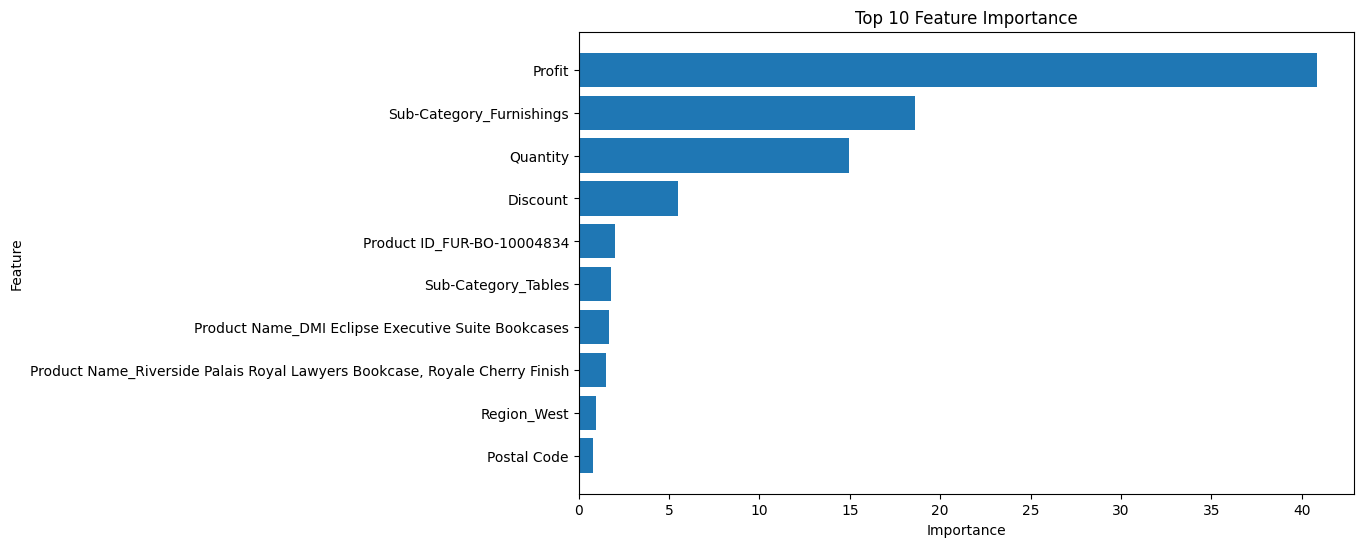

In [ ]:
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()  
plt.show()
